In [1]:
import os
import pandas as pd
import numpy as np

In [2]:
import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
train = pd.read_csv('train.csv')
train.head()

,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,train_0,0,8.9255,-6.7863,11.9081,5.0930,11.4607,-9.2834,5.1187,18.6266,...,4.4354,3.9642,3.1364,1.6910,18.5227,-2.3978,7.8784,8.5635,12.7803,-1.0914
1,train_1,0,11.5006,-4.1473,13.8588,5.3890,12.3622,7.0433,5.6208,16.5338,...,7.6421,7.7214,2.5837,10.9516,15.4305,2.0339,8.1267,8.7889,18.3560,1.9518
2,train_2,0,8.6093,-2.7457,12.0805,7.8928,10.5825,-9.0837,6.9427,14.6155,...,2.9057,9.7905,1.6704,1.6858,21.6042,3.1417,-6.5213,8.2675,14.7222,0.3965
3,train_3,0,11.0604,-2.1518,8.9522,7.1957,12.5846,-1.8361,5.8428,14.9250,...,4.4666,4.7433,0.7178,1.4214,23.0347,-1.2706,-2.9275,10.2922,17.9697,-8.9996
4,train_4,0,9.8369,-1.4834,12.8746,6.6375,12.2772,2.4486,5.9405,19.2514,...,-1.4905,9.5214,-0.1508,9.1942,13.2876,-1.5121,3.9267,9.5031,17.9974,-8.8104


In [4]:
test = pd.read_csv('test.csv')
test.head()

,ID_code,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,test_0,11.0656,7.7798,12.9536,9.4292,11.4327,-2.3805,5.8493,18.2675,2.1337,...,-2.1556,11.8495,-1.4300,2.4508,13.7112,2.4669,4.3654,10.7200,15.4722,-8.7197
1,test_1,8.5304,1.2543,11.3047,5.1858,9.1974,-4.0117,6.0196,18.6316,-4.4131,...,10.6165,8.8349,0.9403,10.1282,15.5765,0.4773,-1.4852,9.8714,19.1293,-20.9760
2,test_2,5.4827,-10.3581,10.1407,7.0479,10.2628,9.8052,4.8950,20.2537,1.5233,...,-0.7484,10.9935,1.9803,2.1800,12.9813,2.1281,-7.1086,7.0618,19.8956,-23.1794
3,test_3,8.5374,-1.3222,12.0220,6.5749,8.8458,3.1744,4.9397,20.5660,3.3755,...,9.5702,9.0766,1.6580,3.5813,15.1874,3.1656,3.9567,9.2295,13.0168,-4.2108
4,test_4,11.7058,-0.1327,14.1295,7.7506,9.1035,-8.5848,6.8595,10.6048,2.9890,...,4.2259,9.1723,1.2835,3.3778,19.5542,-0.2860,-5.1612,7.2882,13.9260,-9.1846


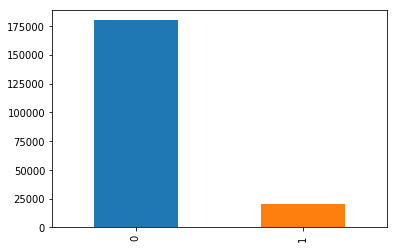

In [5]:
train['target'].value_counts().plot(kind='bar')

In [6]:
# since the distrubution of target lables is very imbalanced, so I will use SMOTE
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE

In [7]:
x_train = train.drop(columns = ['ID_code','target'],axis=1)
y_train = train['target']

In [8]:
from sklearn.preprocessing import StandardScaler
x_train = StandardScaler().fit_transform(x_train)

In [9]:
np.set_printoptions(precision=2, linewidth=80, suppress=True)

In [10]:
test = StandardScaler().fit_transform(test.drop(columns=['ID_code'],axis=1))

In [11]:
test.shape,x_train.shape

((200000, 200), (200000, 200))

In [12]:
sm = SMOTE(random_state=0)
x_train_sm , y_train_sm = sm.fit_sample(x_train,y_train)

In [13]:
x_train_sm.shape,y_train_sm.shape

((359804, 200), (359804,))

In [14]:
y_train_sm = pd.Series(y_train_sm, name ='target')

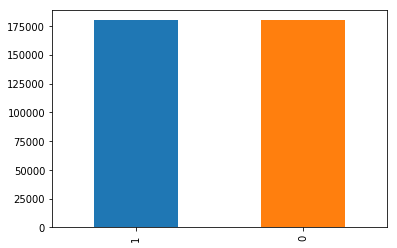

In [15]:
y_train_sm.value_counts().plot(kind='bar')

In [16]:
train = pd.read_csv('train.csv')

x_train_sm = pd.DataFrame(x_train_sm, columns= train.drop(columns=['ID_code','target'],axis=1).columns.values)
x_train_sm.head()

,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,-0.577102,-1.273737,0.451707,-0.833709,0.235571,-0.536430,-0.334926,0.608751,-1.561580,-1.473796,...,0.263374,-1.149158,0.817469,-0.411013,0.168705,-1.578117,1.022131,-0.373968,-1.026398,0.214135
1,0.269959,-0.622138,1.190360,-0.688846,0.790975,1.539900,0.244461,-0.003525,0.858974,0.419300,...,0.966611,0.093605,0.443623,1.908764,-0.817594,1.522342,1.067654,-0.129400,0.825417,0.505685
2,-0.681113,-0.276066,0.516988,0.536516,-0.305477,-0.511033,1.769839,-0.564749,-1.561370,-1.307408,...,-0.072093,0.777997,-0.174131,-0.412316,1.151591,2.297370,-1.617906,-0.695141,-0.381449,0.356681
3,0.125158,-0.129426,-0.667575,0.195355,0.927992,0.410672,0.500633,-0.474201,-1.843910,0.548767,...,0.270216,-0.891456,-0.818468,-0.478548,1.607869,-0.789517,-0.959020,1.501744,0.697118,-0.543502
4,-0.277303,0.035610,0.817683,-0.077829,0.738607,0.955574,0.613372,0.791544,1.794753,0.090006,...,-1.036191,0.688988,-1.405987,1.468536,-1.501101,-0.958473,0.297627,0.645537,0.706318,-0.525375


In [17]:
test = pd.read_csv('test.csv')

x_test = pd.DataFrame(test, columns= test.drop(columns=['ID_code'],axis=1).columns.values)
x_test.head()

,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,11.0656,7.7798,12.9536,9.4292,11.4327,-2.3805,5.8493,18.2675,2.1337,8.8100,...,-2.1556,11.8495,-1.4300,2.4508,13.7112,2.4669,4.3654,10.7200,15.4722,-8.7197
1,8.5304,1.2543,11.3047,5.1858,9.1974,-4.0117,6.0196,18.6316,-4.4131,5.9739,...,10.6165,8.8349,0.9403,10.1282,15.5765,0.4773,-1.4852,9.8714,19.1293,-20.9760
2,5.4827,-10.3581,10.1407,7.0479,10.2628,9.8052,4.8950,20.2537,1.5233,8.3442,...,-0.7484,10.9935,1.9803,2.1800,12.9813,2.1281,-7.1086,7.0618,19.8956,-23.1794
3,8.5374,-1.3222,12.0220,6.5749,8.8458,3.1744,4.9397,20.5660,3.3755,7.4578,...,9.5702,9.0766,1.6580,3.5813,15.1874,3.1656,3.9567,9.2295,13.0168,-4.2108
4,11.7058,-0.1327,14.1295,7.7506,9.1035,-8.5848,6.8595,10.6048,2.9890,7.1437,...,4.2259,9.1723,1.2835,3.3778,19.5542,-0.2860,-5.1612,7.2882,13.9260,-9.1846


In [18]:
x_train_sm['sum'] = x_train_sm.sum(axis=1).values
x_train_sm['mean'] = x_train_sm.mean(axis=1).values
x_train_sm['std'] = x_train_sm.std(axis=1).values
x_train_sm['min'] = x_train_sm.min(axis=1).values
x_train_sm['max'] = x_train_sm.max(axis=1).values
x_train_sm['skew'] = x_train_sm.skew(axis=1).values
x_train_sm['kurt'] = x_train_sm.kurtosis(axis=1).values
x_train_sm['med'] = x_train_sm.median(axis=1).values

In [19]:
x_test['sum'] = x_test.sum(axis=1).values
x_test['mean'] = x_test.mean(axis=1).values
x_test['std'] = x_test.std(axis=1).values
x_test['min'] = x_test.min(axis=1).values
x_test['max'] = x_test.max(axis=1).values
x_test['skew'] = x_test.skew(axis=1).values
x_test['kurt'] = x_test.kurtosis(axis=1).values
x_test['med'] = x_test.median(axis=1).values

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x_train_sm,y_train_sm,test_size=0.3, random_state=0)

In [21]:
from sklearn.neural_network import MLPClassifier
MLP = MLPClassifier(hidden_layer_sizes=(5,3,2),
                     max_iter=1, 
                     activation='relu', 
                     learning_rate='constant',
                     learning_rate_init=0.001,
                     batch_size = 1,
                     solver='adam',
                     verbose =1)
MLP.fit(X_train, y_train)
y_pred = MLP.predict(X_test)

Iteration 1, loss = 0.40856671


In [22]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,y_pred)

0.8347824695051215

In [23]:
MLP_train_score = MLP.score(X_train, y_train)
MLP_test_score = MLP.score(X_test, y_test)
print(MLP_train_score,MLP_test_score)

0.8372878798707228 0.8347816419929222


In [24]:
y_score= MLP.predict(x_test)

pd.DataFrame({'ID_code': test['ID_code'],'target': y_score}).to_csv('MLP5_submission.csv',index=False)

In [28]:
from feature_selector import FeatureSelector
# Features are in train and labels are in train_labels
fs = FeatureSelector(data = x_train_sm, labels = y_train_sm)

In [29]:
fs.identify_missing(missing_threshold = 0.6)

0 features with greater than 0.60 missing values.



In [30]:
#The identify_collinear method finds collinear features based on a specified correlation coefficient value
fs.identify_collinear(correlation_threshold = 0.98)

2 features with a correlation magnitude greater than 0.98.



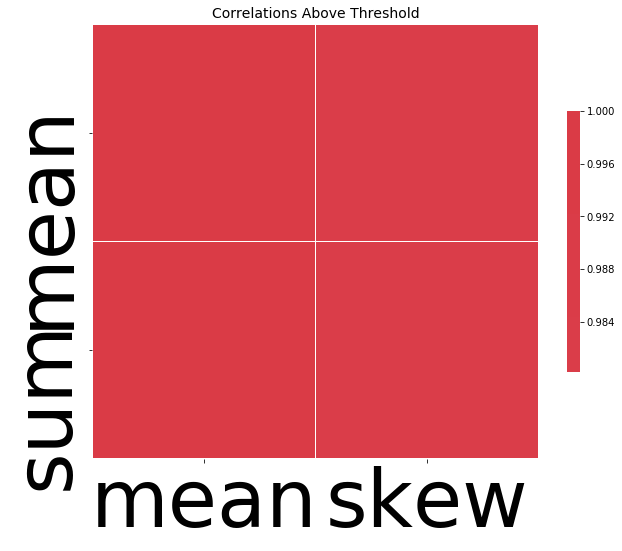

In [31]:
fs.plot_collinear()

In [32]:
# list of collinear features to remove
collinear_features = fs.ops['collinear']
# dataframe of collinear features
fs.record_collinear.head()

,drop_feature,corr_feature,corr_value
0,mean,sum,1.000000
1,skew,sum,0.980183
2,skew,mean,0.980183


In [33]:
# Pass in the appropriate parameters
fs.identify_zero_importance(task = 'classification', 
                            eval_metric = 'auc', 
                            n_iterations = 10, 
                             early_stopping = True)
# list of zero importance features
zero_importance_features = fs.ops['zero_importance']

Training Gradient Boosting Model

Training until validation scores don't improve for 100 rounds.
Did not meet early stopping. Best iteration is:
[1000]	valid_0's auc: 0.978243	valid_0's binary_logloss: 0.201214
Training until validation scores don't improve for 100 rounds.
Did not meet early stopping. Best iteration is:
[1000]	valid_0's auc: 0.978212	valid_0's binary_logloss: 0.200399
Training until validation scores don't improve for 100 rounds.
Did not meet early stopping. Best iteration is:
[1000]	valid_0's auc: 0.977977	valid_0's binary_logloss: 0.202079
Training until validation scores don't improve for 100 rounds.
Did not meet early stopping. Best iteration is:
[1000]	valid_0's auc: 0.977625	valid_0's binary_logloss: 0.202709
Training until validation scores don't improve for 100 rounds.
Did not meet early stopping. Best iteration is:
[1000]	valid_0's auc: 0.978247	valid_0's binary_logloss: 0.201576
Training until validation scores don't improve for 100 rounds.
Did not meet early

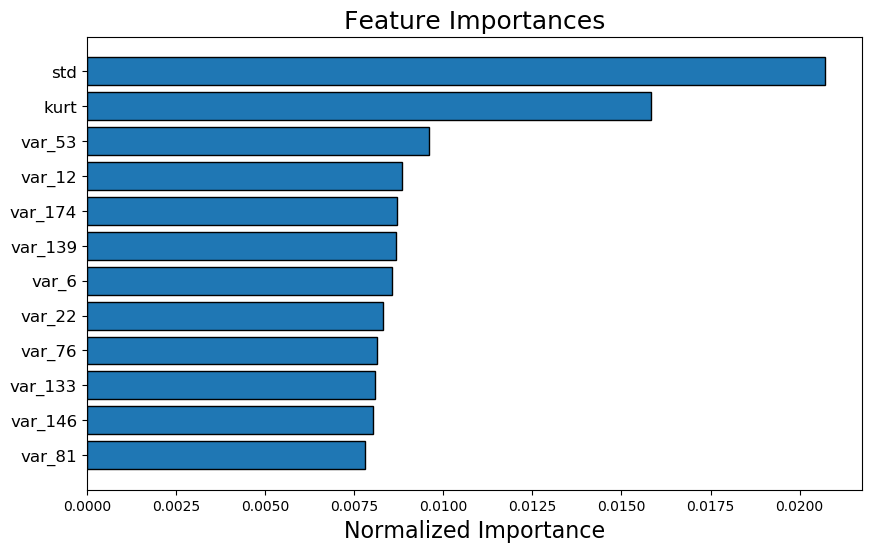

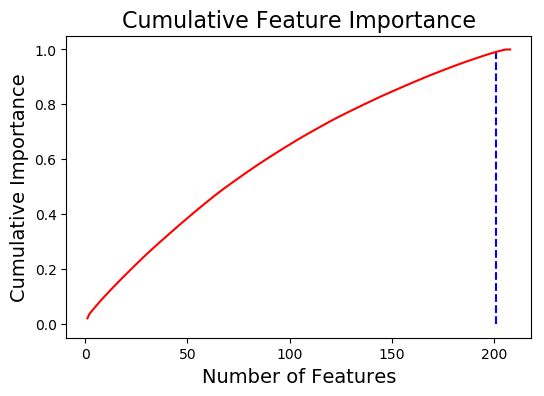

201 features required for 0.99 of cumulative importance


In [34]:
# plot the feature importances
fs.plot_feature_importances(threshold = 0.99, plot_n = 12)

In [35]:
x_train_sm.shape

(359804, 208)

In [36]:
fs.identify_low_importance(cumulative_importance = 0.99)

200 features required for cumulative importance of 0.99 after one hot encoding.
8 features do not contribute to cumulative importance of 0.99.



In [37]:
fs.feature_importances.head(10)

,feature,importance,normalized_importance,cumulative_importance
0,std,621.4,0.020713,0.020713
1,kurt,474.5,0.015817,0.036530
2,var_53,288.0,0.009600,0.046130
3,var_12,265.6,0.008853,0.054983
4,var_174,260.8,0.008693,0.063677
5,var_139,260.0,0.008667,0.072343
6,var_6,256.7,0.008557,0.080900
7,var_22,249.4,0.008313,0.089213
8,var_76,243.8,0.008127,0.097340
9,var_133,242.2,0.008073,0.105413


In [38]:
fs.feature_importances.tail(10)

,feature,importance,normalized_importance,cumulative_importance
198,var_4,67.5,0.002250,0.986503
199,var_68,66.4,0.002213,0.988717
200,var_152,63.9,0.002130,0.990847
201,var_16,62.5,0.002083,0.992930
202,var_98,59.0,0.001967,0.994897
203,var_60,57.7,0.001923,0.996820
204,var_69,51.5,0.001717,0.998537
205,sum,36.1,0.001203,0.999740
206,med,7.8,0.000260,1.000000
207,mean,0.0,0.000000,1.000000


In [39]:
fs.identify_single_unique()

0 features with a single unique value.



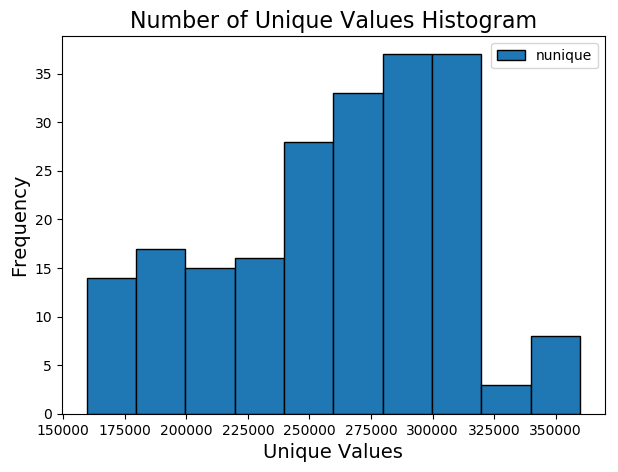

In [40]:
fs.plot_unique()

In [41]:
# Remove the features from all methods (returns a df)
train_removed = fs.remove(methods = 'all')

['missing', 'collinear', 'zero_importance', 'low_importance', 'single_unique'] methods have been run

Removed 9 features.


In [42]:
train_new = fs.remove(methods = 'all', keep_one_hot=False)

['missing', 'collinear', 'zero_importance', 'low_importance', 'single_unique'] methods have been run

Removed 9 features including one-hot features.


In [43]:
train_new.head()

,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,...,var_194,var_195,var_196,var_197,var_198,var_199,std,min,max,kurt
0,-0.577102,-1.273737,0.451707,-0.833709,0.235571,-0.536430,-0.334926,0.608751,-1.561580,-1.473796,...,0.168705,-1.578117,1.022131,-0.373968,-1.026398,0.214135,0.966269,-1.933508,2.285292,-0.675318
1,0.269959,-0.622138,1.190360,-0.688846,0.790975,1.539900,0.244461,-0.003525,0.858974,0.419300,...,-0.817594,1.522342,1.067654,-0.129400,0.825417,0.505685,1.547785,-2.478500,16.275490,43.273609
2,-0.681113,-0.276066,0.516988,0.536516,-0.305477,-0.511033,1.769839,-0.564749,-1.561370,-1.307408,...,1.151591,2.297370,-1.617906,-0.695141,-0.381449,0.356681,1.524995,-17.679884,2.297370,54.425440
3,0.125158,-0.129426,-0.667575,0.195355,0.927992,0.410672,0.500633,-0.474201,-1.843910,0.548767,...,1.607869,-0.789517,-0.959020,1.501744,0.697118,-0.543502,1.059275,-4.313151,2.455127,0.950488
4,-0.277303,0.035610,0.817683,-0.077829,0.738607,0.955574,0.613372,0.791544,1.794753,0.090006,...,-1.501101,-0.958473,0.297627,0.645537,0.706318,-0.525375,1.283040,-2.466105,11.632315,28.306071


In [63]:
train_new.columns.values

array(['var_0', 'var_1', 'var_2', 'var_3', 'var_4', 'var_5', 'var_6', 'var_7',
       'var_8', 'var_9', 'var_10', 'var_11', 'var_12', 'var_13', 'var_14',
       'var_15', 'var_17', 'var_18', 'var_19', 'var_20', 'var_21', 'var_22',
       'var_23', 'var_24', 'var_25', 'var_26', 'var_27', 'var_28', 'var_29',
       'var_30', 'var_31', 'var_32', 'var_33', 'var_34', 'var_35', 'var_36',
       'var_37', 'var_38', 'var_39', 'var_40', 'var_41', 'var_42', 'var_43',
       'var_44', 'var_45', 'var_46', 'var_47', 'var_48', 'var_49', 'var_50',
       'var_51', 'var_52', 'var_53', 'var_54', 'var_55', 'var_56', 'var_57',
       'var_58', 'var_59', 'var_61', 'var_62', 'var_63', 'var_64', 'var_65',
       'var_66', 'var_67', 'var_68', 'var_70', 'var_71', 'var_72', 'var_73',
       'var_74', 'var_75', 'var_76', 'var_77', 'var_78', 'var_79', 'var_80',
       'var_81', 'var_82', 'var_83', 'var_84', 'var_85', 'var_86', 'var_87',
       'var_88', 'var_89', 'var_90', 'var_91', 'var_92', 'var_93', 'var_94',

#fs.identify_all(selection_params = {'missing_threshold': 0.6,    
                                    'correlation_threshold': 0.98, 
                                    'task': 'classification',    
                                    'eval_metric': 'auc', 
                                    'cumulative_importance': 0.99})

In [65]:
x_train_sm.head()

,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,...,var_198,var_199,sum,mean,std,min,max,skew,kurt,med
0,-0.577102,-1.273737,0.451707,-0.833709,0.235571,-0.536430,-0.334926,0.608751,-1.561580,-1.473796,...,-1.026398,0.214135,0.921360,0.009168,0.966269,-1.933508,2.285292,0.086401,-0.675318,-0.009778
1,0.269959,-0.622138,1.190360,-0.688846,0.790975,1.539900,0.244461,-0.003525,0.858974,0.419300,...,0.825417,0.505685,16.275490,0.161945,1.547785,-2.478500,16.275490,5.719200,43.273609,0.146206
2,-0.681113,-0.276066,0.516988,0.536516,-0.305477,-0.511033,1.769839,-0.564749,-1.561370,-1.307408,...,-0.381449,0.356681,-17.679884,-0.175919,1.524995,-17.679884,2.297370,-6.929393,54.425440,-0.075314
3,0.125158,-0.129426,-0.667575,0.195355,0.927992,0.410672,0.500633,-0.474201,-1.843910,0.548767,...,0.697118,-0.543502,-4.313151,-0.042917,1.059275,-4.313151,2.455127,-0.453156,0.950488,0.022063
4,-0.277303,0.035610,0.817683,-0.077829,0.738607,0.955574,0.613372,0.791544,1.794753,0.090006,...,0.706318,-0.525375,11.632315,0.115744,1.283040,-2.466105,11.632315,4.125224,28.306071,0.072839


In [50]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train_new,y_train_sm,test_size=0.3, random_state=0)

In [51]:
from sklearn.neural_network import MLPClassifier
MLP = MLPClassifier(hidden_layer_sizes=(5,3,2),
                     max_iter=1, 
                     activation='relu', 
                     learning_rate='constant',
                     learning_rate_init=0.001,
                     batch_size = 1,
                     solver='adam',
                     verbose =1)
MLP.fit(X_train, y_train)
y_pred = MLP.predict(X_test)

Iteration 1, loss = 0.41357367


C:\Users\Yanhong Simokat\Ananconda27\envs\py36\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [52]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,y_pred)

0.8410344985714582

In [53]:
MLP_train_score = MLP.score(X_train, y_train)
MLP_test_score = MLP.score(X_test, y_test)
print(MLP_train_score,MLP_test_score)

0.8419928373474362 0.8410442645124233


In [68]:
x_test = x_test.drop(columns=['var_152','var_16','var_98','var_60','var_69','sum','med','mean','skew'],axis=1)

In [69]:
y_score= MLP.predict(x_test)

pd.DataFrame({'ID_code': test['ID_code'],'target': y_score}).to_csv('MLP6_submission.csv',index=False)